# Program 8 - Apply EM Algorithm to cluster a set of data stored in a .CSV File. Use the same data set for clustering using K-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering.  You can add Java/Python ML library classes/ API in the program 

### Importing the required libraries

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python  
  
matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### Reading the data as a DataFrame Object

pd.read_csv(filename or buffer, sep=',', delimiter=None) - reads the CSV File into the DataFrame and returns a DataFrame.  

head(n=5) : Return the first 'n' rows. It is useful for quickly testing if your object has the right type of data in it  
  


In [2]:
df = pd.read_csv("Program8DataSet.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Select the required columns using Integer-based indexing

df.iloc[ : , : ] - Integer-location based indexing for selection by position. First parameter is for selection of rows and the second one is for selection of columns.

In [3]:
x = df.iloc[:, 1:-1].values
print(x[:5])

[['Male' 19 15]
 ['Male' 21 15]
 ['Female' 20 16]
 ['Female' 23 16]
 ['Female' 31 17]]


### Encode the labels with values 

The first column in the DataFrame has a string( 'Male' or 'Female' ). These two strings can be assigned values like 0 and 1 respectively. This preprocessing is done by a built-in function from sklearn.preprocessing known as LabelEnocder  
  
Instantiate the class LabelEncoder  
  
LabelEncoder() : Encode labels with value between 0 and n_classes-1. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

fit_transform(self, y) : Fit label encoder and return encoded labels.

In [4]:
from sklearn.preprocessing import LabelEncoder
x[:, 0] = LabelEncoder().fit_transform(x[:, 0])
print(x[:5])


[[1 19 15]
 [1 21 15]
 [0 20 16]
 [0 23 16]
 [0 31 17]]


### EM and KMeans

#### EM Algorithm  

GaussianMixture() : Representation of a Gaussian mixture model probability distribution. This class allows to estimate the parameters of a Gaussian mixture distribution.  
Parameters:  
n_components : int, defaults to 1. The number of mixture components.
  
fit(self,X,y) : Estimate model parameters with the EM algorithm.
  
predict(self, X) :  Predict the labels for the data samples in X using trained model.
  
#### KMeans

KMeans() : K-Means Clustering.   
Parameters :   
n_clusters : int, optional, default: 8. The number of clusters to form as well as the number of centroids to generate.
  
fit(self, X, y=None) : Compute k-means clustering.  
Parameters :   
X : array-like or sparse matrix, shape=(n_samples, n_features) Training instances to cluster.  
y : Ignored.  
  
predict(self, X) : Predict the closest cluster each sample in X belongs to.
    

In [5]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
em_cluster = GaussianMixture(n_components = 5)
km_cluster = KMeans(n_clusters=5)
em_cluster.fit(x)
km_cluster.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
em_predictions = em_cluster.predict(x)
km_predictions = km_cluster.predict(x)
print(em_predictions)
print(km_predictions)

[2 2 1 1 1 1 1 1 2 1 2 1 0 1 2 2 1 2 2 1 2 2 0 2 0 2 0 2 0 3 2 3 2 2 0 3 0
 3 0 3 0 2 2 3 0 3 0 3 3 3 0 2 3 2 0 2 0 2 3 2 2 2 0 0 2 2 0 0 2 3 2 0 0 0
 2 2 0 2 4 0 2 2 2 0 4 2 0 4 0 0 0 2 2 0 0 2 0 4 2 2 4 0 2 2 2 4 0 2 2 2 2
 4 0 2 4 4 0 0 0 0 2 0 0 2 4 4 2 2 2 2 2 2 4 4 2 4 0 2 2 4 0 2 4 4 2 2 2 4
 4 2 2 2 0 0 0 4 2 4 2 4 0 4 2 4 2 4 2 4 4 2 2 2 2 2 0 4 2 2 2 2 4 4 2 4 4
 2 0 2 4 4 4 4 2 4 4 4 4 2 2 2]
[1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1
 1 1 1 2 1 2 1 2 1 2 1 1 1 2 1 1 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


### Plot the predicted values

scatter(x, y, c=None) : A scatter plot of y vs x with varying marker size and/or color.
Parameters :   
x, y : array_like, shape (n, ). The data positions.  
  
c : color, sequence, or sequence of color, optional, default: 'b'  
The marker color. Possible values:
- A single color format string.
- A sequence of color specifications of length n.
- A sequence of n numbers to be mapped to colors using cmap and norm
- A 2-D array in which the rows are RGB or RGBA.  
  
show() : Display a figure. When running in ipython with its pylab mode, display all figures and return to the ipython prompt.

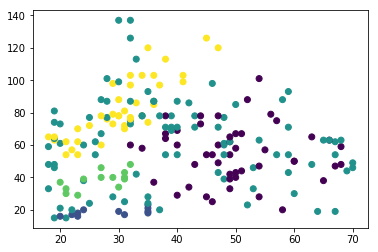

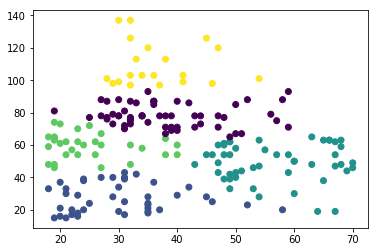

In [7]:
plt.scatter(x[:, 1], x[:, 2],c=em_predictions)
plt.show()
plt.scatter(x[:, 1], x[:, 2], c=km_predictions)
plt.show()

### Hope this helps :) 

#### Follow my work [here](https://github.com/NandanSatheesh)